In [1]:
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd

In [20]:
x1=np.random.randint(1,30,200000)
x2=np.random.randint(1,30,200000)

y=4+2*x1+3*x2+3*np.random.random(200000)

In [21]:
w=np.random.random(3)

In [22]:
x=pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})

In [23]:
x

const  x1  x2
0         1.0   8   2
1         1.0   7  12
2         1.0  17  12
3         1.0  27  24
4         1.0  13  27
...       ...  ..  ..
199995    1.0  18  11
199996    1.0   6  29
199997    1.0  27  18
199998    1.0  29   1
199999    1.0  29  23

[200000 rows x 3 columns]

## Estimated paramter values from sklearn

In [24]:
lr=LinearRegression()
lr.fit(x.iloc[:,1:],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
w_sklearn=[lr.intercept_]+list(lr.coef_)
w_sklearn

[5.495262710640631, 2.0001238177415144, 3.0000442830723557]

## Paramter Estimation with Gradient Descent

In [26]:
def mypred(features,weights):
    
    preds=np.dot(features,weights)
    return(preds)

In [27]:
mypred(x,w).shape

(200000,)

In [28]:
def myerror(target,features,weights):
    
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [29]:
myerror(y,x,w)

array([18.39878824, 39.60719721, 52.15161133, ..., 78.12974654,
       43.14938917, 91.81836701])

In [30]:
def mycost(target,features,weights):
    
    errors=myerror(target,features,weights)
    cost=np.dot(errors.T,errors) #square of error 
    return(cost)

In [31]:
mycost(y,x,w)

744995882.6003962

In [32]:
def gradient(target,features,weights):
    
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    return(grad)

In [33]:
gradient(y,x,w)

array([  -57.1794484 ,  -941.92108149, -1013.97767085])

In [34]:
def my_lr_gd(target,features,learning_rate,num_steps):
    
    weights=np.random.random(features.shape[1])
    cost=[]
    for i in range(num_steps):
        
        weights-=learning_rate*gradient(target,features,weights)
        
        
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [35]:
cost_gd,w_gd=my_lr_gd(y,x,.001,1000)

In [36]:
w_gd

array([1.50344759, 2.11563241, 3.11505277])

In [37]:
w_sklearn/w_gd

array([3.65510759, 0.94540233, 0.96307976])

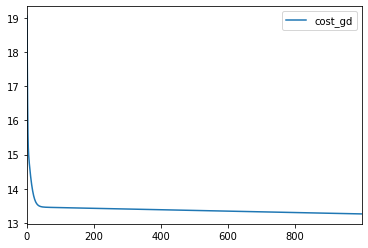

In [38]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot()

In [39]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [40]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [41]:
w_sgd

array([0.89554628, 2.1340739 , 3.14603676])

In [42]:
w_sklearn/w_sgd

array([6.13621297, 0.93723269, 0.9535948 ])

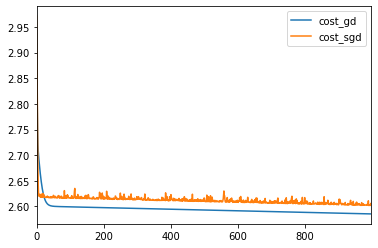

In [43]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot()

In [44]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    beta=0.9
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        vw=beta*vw+(1-beta)*gradient(target_sub,features_sub,weights)
        
        vw_a=vw/(1-beta**(i+1))
        
        weights -= learning_rate*vw_a
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [45]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000)

In [46]:
w_mom

array([4.0339938 , 2.10102954, 3.02470572])

In [47]:
w_sklearn/w_mom

array([1.36223876, 0.9519732 , 0.99184666])

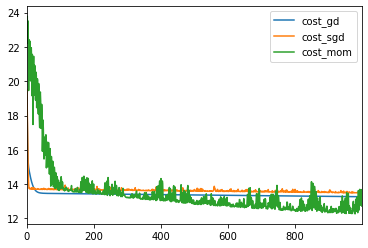

In [48]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot()

In [49]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    beta=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        sw=beta*sw+(1-beta)*(gd**2)
        
        sw_a=sw/(1-beta**(i+1))
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [50]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [51]:
w_rms

array([5.56530738, 2.0629393 , 3.03766821])

In [52]:
w_sklearn/w_rms

array([0.98741405, 0.9695505 , 0.98761421])

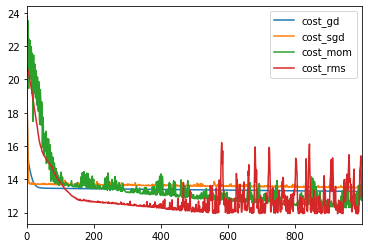

In [53]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot()

In [59]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        vw=beta1*vw+(1-beta1)*gd
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights -= learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [60]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [56]:
w_adam

array([5.39356387, 1.9870506 , 2.99209128])

In [57]:
w_sklearn/w_adam

array([1.01885559, 1.00657921, 1.00265801])

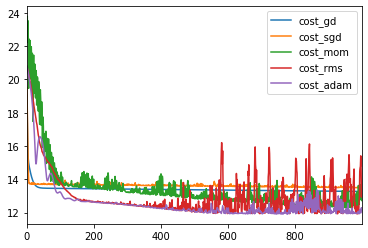

In [58]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot()